In [6]:
# Python 3
import http.client, urllib.parse

conn = http.client.HTTPConnection('api.positionstack.com')

params = urllib.parse.urlencode({
    'access_key': 'c20e9d943af6d8fa43a7811393b07ee2',
    'query': '6.6778, 3.1654',
    'output': 'json',
    'limit': 1,
    'fields': 'results.name,street,locality,region,country,postal_code'
    })

conn.request('GET', '/v1/reverse?{}'.format(params))

res = conn.getresponse()
data = res.read()

print(data.decode('utf-8'))


{"data":[{"latitude":6.676689,"longitude":3.16735,"type":"venue","distance":0.249,"name":"Faith Tabarnacle","number":null,"postal_code":null,"street":null,"confidence":0.7,"region":"Ogun","region_code":"OG","county":"Ado-Odo\/Ota","locality":"Agege","administrative_area":null,"neighbourhood":null,"country":"Nigeria","country_code":"NGA","continent":"Africa","label":"Faith Tabarnacle, Agege, OG, Nigeria"}]}


In [5]:
print(data.decode('utf-8')["data"])

TypeError: string indices must be integers, not 'str'

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("/Users/wikiwoo/Downloads/Question 3 - Program Application (Public) - Sheet1.csv")
data.head()

,Customer Name,Order Date,Order Amount,Country
0,John Doe,2025-01-01,150,USA
1,Jane Smith,2025-01-02,50,Canada
2,Alice Johnson,2025-01-03,200,UK
3,Bob Brown,2025-01-04,120,Germany
4,Charlie White,2025-01-05,90,France


In [9]:
total_amount = data.query("`Customer Name` == 'John Doe'")["Order Amount"].sum()
print(total_amount)

990


In [11]:
total_amount = data.loc[data["Customer Name"] == "John Doe", "Order Amount"].sum()
print(total_amount)  # Output: 250 (100 + 150)


990


In [17]:
data.groupby("Country")["Order Amount"].sum().sort_values(ascending=False).head(1)

Country
USA    5310
Name: Order Amount, dtype: int64

In [18]:
total = data[
    (data["Customer Name"] == "John Doe") & 
    (data["Order Amount"] > 100)
]["Order Amount"].sum()

print(f"Total order value for John Doe (orders > $100): ${total:.2f}")

Total order value for John Doe (orders > $100): $890.00


In [19]:
import pandas as pd

# Filter orders > $100, group by country, sum revenue, and sort
highest_revenue_country = (
    data[data["Order Amount"] > 100]          # Filter orders > $100
    .groupby("Country")["Order Amount"]       # Group by country
    .sum()                                   # Sum revenue per country
    .sort_values(ascending=False)            # Sort descending
    .head(1)                                 # Get top country
)

print(f"Country with highest revenue (orders > $100): {highest_revenue_country.index[0]} (${highest_revenue_country.values[0]:,.2f})")

Country with highest revenue (orders > $100): USA ($4,680.00)


In [20]:
import pandas as pd

# Calculate average order amount for orders > $100
avg_high_value = data[data["Order Amount"] > 100]["Order Amount"].mean()

print(f"Average order amount (orders > $100): ${avg_high_value:,.2f}")

Average order amount (orders > $100): $193.15


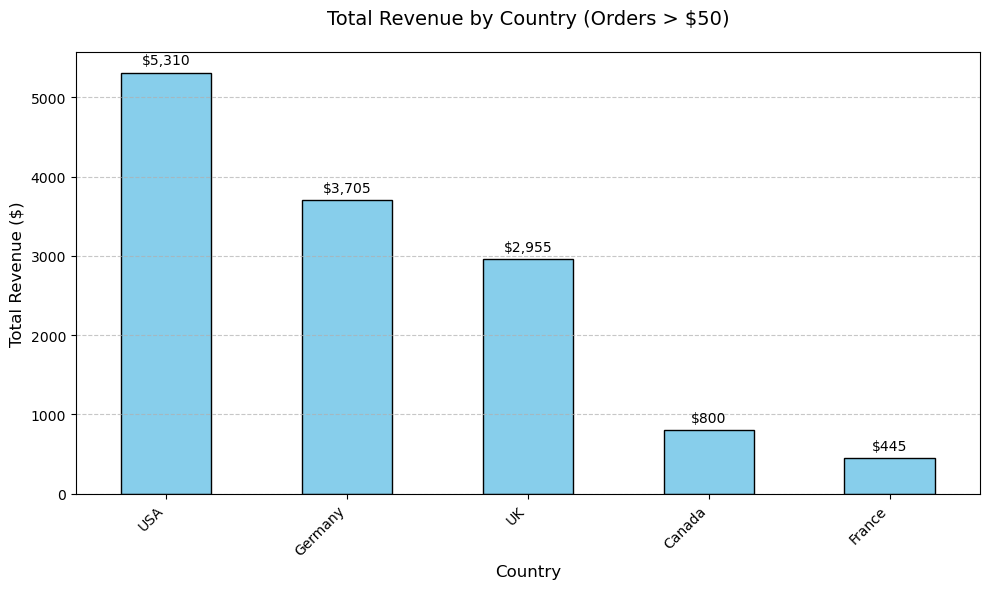

In [21]:
import matplotlib.pyplot as plt

# 1. Filter orders > $50 and group by country
revenue_by_country = (
    data[data["Order Amount"] > 50]
    .groupby("Country")["Order Amount"]
    .sum()
    .sort_values(ascending=False)
)

# 2. Create the bar chart
plt.figure(figsize=(10, 6))
revenue_by_country.plot(kind="bar", color="skyblue", edgecolor="black")

# 3. Format the chart
plt.title("Total Revenue by Country (Orders > $50)", fontsize=14, pad=20)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 4. Add value labels on top of bars
for i, value in enumerate(revenue_by_country):
    plt.text(i, value + (max(revenue_by_country)*0.02), 
             f"${value:,.0f}", 
             ha="center",
             fontsize=10)

plt.tight_layout()
plt.show()